<a href="https://colab.research.google.com/github/LEFT-BEE/small_project/blob/main/mnist_csv_img_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from keras import layers

In [15]:
test_data = pd.read_csv("/content/drive/MyDrive/Kaggle project/recognition_digit/test.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Kaggle project/recognition_digit/train.csv")
print(train_data.shape)#42000개의 데이터를 가진 csv파일 train에는 label 이 있어 axis=1의 크기가 785이다
print(test_data.shape)

(42000, 785)
(28000, 784)


In [16]:
label = train_data.label
train_data = train_data.drop("label" , axis =1);

In [51]:
model = keras.models.Sequential([
    
    layers.Dense(input_dim = 784 , units = 512, activation="relu"),
    layers.Dense(256,activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
val_train  , val_label = train_data[40000:42000] , label[40000:42000]

In [55]:
model.fit(train_data , label , epochs = 10)#이거 왜 데이터가 1313개만 학습이 될까...?

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1303 - accuracy: 0.9656
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1226 - accuracy: 0.9680
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1162 - accuracy: 0.9705
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1035 - accuracy: 0.9737
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0988 - accuracy: 0.9743
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0883 - accuracy: 0.9777
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0783 - accuracy: 0.9797
Epoch 8/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0887 - accuracy: 0.9796
Epoch 9/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0778 - accuracy: 0.9817
Epoch 10/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.068

In [60]:
test_loss, test_acc = model.evaluate(val_train, val_label)
print('테스트 정확도:', test_acc)

157/157 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9818
테스트 정확도: 0.9818000197410583


In [71]:
loss, accuracy = [], []
for i in range(10):
    model.fit(val_train, val_label, epochs=1)
    loss.append((model.evaluate(val_train), val_label)[0])
    accuracy.append(model.evaluate(val_train, val_label)[1])
print(accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9940
[0.965499997138977, 0.9769999980926514, 0.9804999828338623, 0.9835000038146973, 0.9879999756813049, 0.9894999861717224, 0.9934999942779541, 0.9940000176429749, 0.9944999814033508, 0.9940000176429749]


In [75]:
from matplotlib import pyplot as plt
y_value = accuracy
loss_value = loss
x_value = [1,2,3,4,5,6,7,8,9,10]

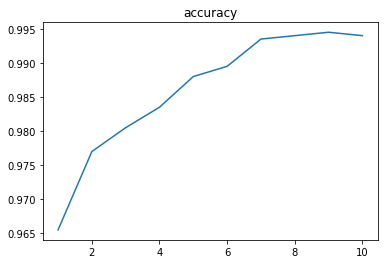

In [80]:
plt.plot(x_value , y_value , label = "accuracy")
plt.title("accuracy")
plt.show()